In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("csvs\heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Subtask 1


In [21]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split 
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

scalers = [None, StandardScaler(), MinMaxScaler(), MaxAbsScaler()]
accuracies = {}

X = df.drop(columns=["target"])
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = LinearSVC()

for scaler in scalers:
    X_train_scaled = scaler.fit_transform(X_train) if scaler is not None else X_train
    X_test_scaled = scaler.fit_transform(X_test) if scaler is not None else X_test

    clf.fit(X_train_scaled, y_train)
    pred = clf.predict(X_test_scaled)

    col = scaler.__class__.__name__ if scaler is not None else "Initial"
    accuracies[col] = [accuracy_score(y_test, pred)]
accuracies

{'Initial': [0.8021978021978022],
 'StandardScaler': [0.8461538461538461],
 'MinMaxScaler': [0.8021978021978022],
 'MaxAbsScaler': [0.7912087912087912]}

If we scale X_test the accuracies are much bigger, but if it's left alone, the accuracies show down for the scaled models

In [22]:
results = pd.DataFrame(data = accuracies)
results

,Initial,StandardScaler,MinMaxScaler,MaxAbsScaler
0,0.802198,0.846154,0.802198,0.791209


We can slearly see that Standard Sclaer has the best results, while the other sclaers and the initial non scaled dataset are close in performance

In [23]:
df.corr().style.background_gradient(cmap="coolwarm")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [24]:
df_corr = df[["oldpeak", "thalach", "target"]]

## Decision Boundary

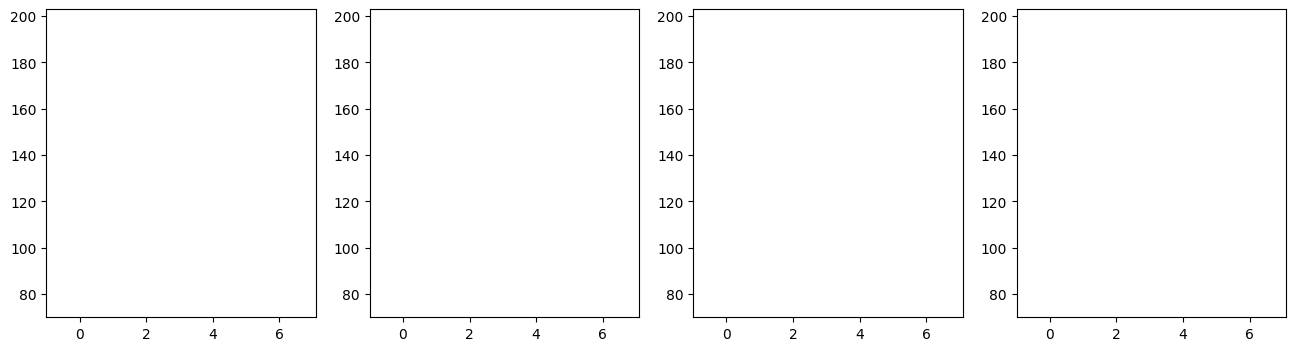

In [ ]:
from sklearn.svm import SVC

X = np.array(df_corr[["oldpeak", "thalach"]])
y = np.array(df_corr["target"])

scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

kernels = ["linear", "poly", "rbf", "sigmoid"]

# define bounds of the domain
min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1

# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)

# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

fig, axes = plt.subplots(1, 4, figsize = (16, 4)) 

for i, kernel in enumerate(kernels):
    clf = SVC(kernel=kernel, random_state=42)
    clf.fit(X_train_scaled, y_train)

    # make predictions for the grid
    yhat = clf.predict(grid)

    # reshape the predictions back into a grid
    zz = yhat.reshape(xx.shape)

    # plot the grid of x, y and z values as a surface
    axes[i].contourf(xx, yy, zz, alpha = 0)

In [ ]:
#comment